In [53]:

import numpy as np 
import pandas as pd 
telcom = pd.read_csv('Telco-Customer-Churn.csv')
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [54]:
print ("\nFeatures : \n" ,telcom.columns.values)
print ("\nMissing values :  ", telcom.isnull().sum().values.sum())
print ("\nUnique values :  \n",telcom.nunique())


Features : 
 ['customerID' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn']

Missing values :   0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [55]:

import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt

sns.set(style = 'white')

# Input data files are available in the "../input/" directory.

import os

In [56]:
telcom.TotalCharges = pd.to_numeric(telcom.TotalCharges, errors='coerce')
telcom.isnull().sum()
telcom['TotalCharges'] = telcom['TotalCharges'].replace(" ", 0).astype('float32')## deal with missing values in totalcharges

In [57]:
telcom.iloc[:,1:].replace(to_replace='Yes', value=1, inplace=True)
telcom.iloc[:,1:].replace(to_replace='No',  value=0, inplace=True)
#####replace the  predictor variable which is customer id
#in a binary numeric variable
df_dummies = pd.get_dummies(telcom.iloc[:,1:])
df_dummies.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,29.85,29.850000,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,1,0
1,0,34,56.95,1889.500000,0,1,1,0,1,0,...,1,0,1,0,0,0,0,1,1,0
2,0,2,53.85,108.150002,0,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
3,0,45,42.30,1840.750000,0,1,1,0,1,0,...,1,0,1,0,1,0,0,0,1,0
4,0,2,70.70,151.649994,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1


Exploratory data analysis

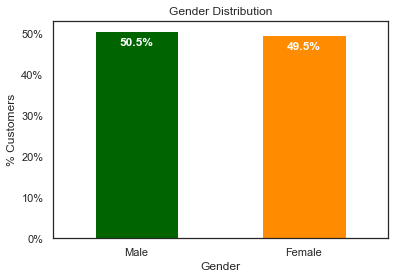

In [58]:
colors = ['#006400','#ff8c00']
ax = (telcom['gender'].value_counts()*100.0 /len(telcom)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')


Text(0.5, 1.0, '# of Customers by Contract Type')

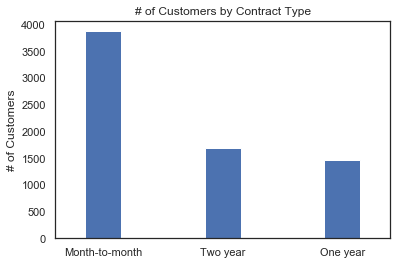

In [59]:
ax = telcom['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3,color = ['b'])
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

####contract distribution 

Text(0.5, 1.0, '% of Senior Citizens')

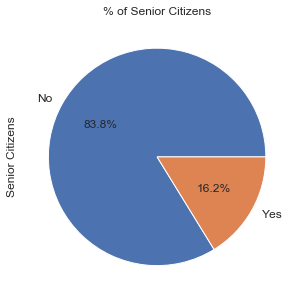

In [60]:
ax = (telcom['SeniorCitizen'].value_counts()*100.0 /len(telcom))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

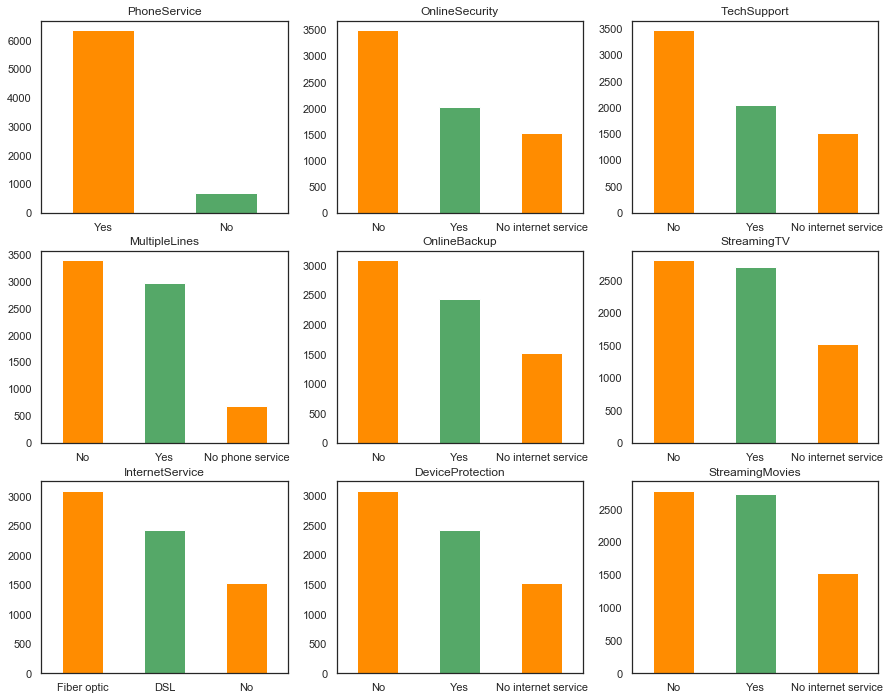

In [61]:
##distribution of services used by customers

services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = telcom[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0,color = ['darkorange','g'])
        
    elif i >=3 and i < 6:
        ax = telcom[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0,color = ['darkorange','g'])
        
    elif i < 9:
        ax = telcom[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0,color = ['darkorange','g'])
    ax.set_title(item)

now we are going to visulaze the distribution on churn or not

Text(0.5, 1.0, '% of Senior Citizens')

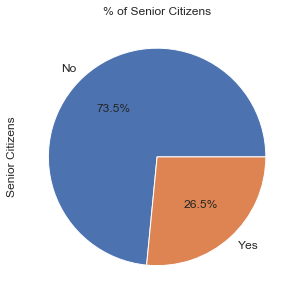

In [62]:
ax = (telcom['Churn'].value_counts()*100.0 /len(telcom))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

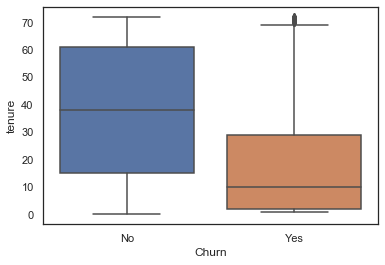

In [63]:
sns.boxplot(x = telcom.Churn, y = telcom.tenure)

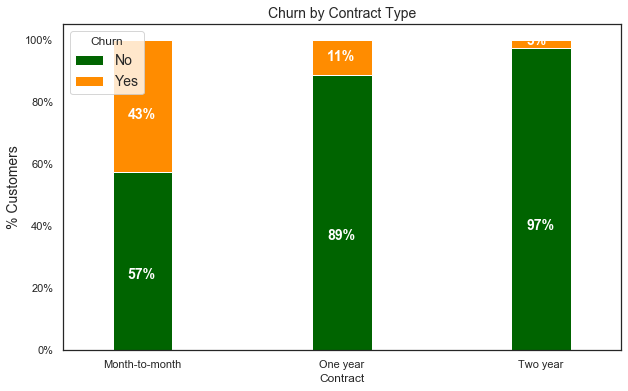

In [64]:
colors = ['#006400','#ff8c00']
contract_churn = telcom.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

which is clearly to see that for those people who made shorter contract, they are more likely to churn compared to those people who made longer contract

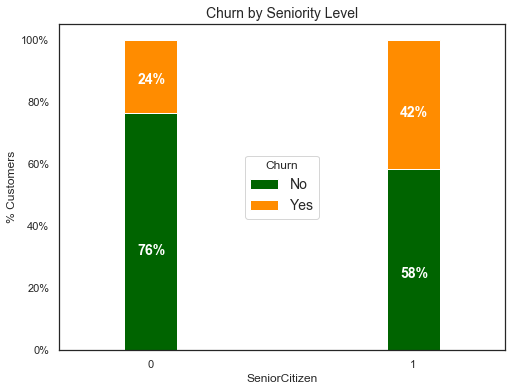

In [65]:
colors = ['#006400','#ff8c00']
seniority_churn = telcom.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

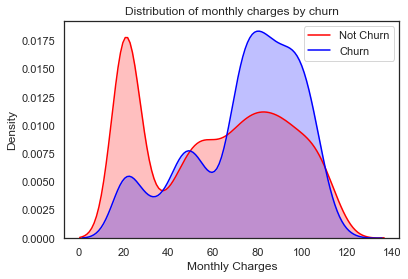

In [66]:
ax = sns.kdeplot(telcom.MonthlyCharges[(telcom["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(telcom.MonthlyCharges[(telcom["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

From above figure, we can tell that churn rate grows faster when the monthly charges from 60 to 100, but decrease sharply after 100, now we need to check the total charges

Text(0.5, 1.0, 'Distribution of total charges by churn')

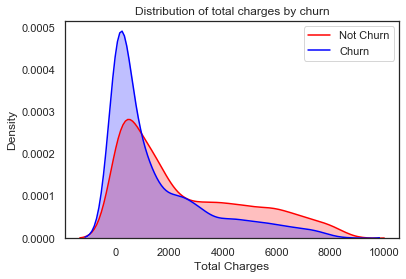

In [67]:
ax = sns.kdeplot(telcom.TotalCharges[(telcom["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(telcom.TotalCharges[(telcom["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

In [69]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#customer id col
Id_col     = ['customerID']
#Target columns
target_col = ["Churn"]
#categorical columns
cat_cols   = telcom.nunique()[telcom.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
#numerical columns
num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col + Id_col]
#Binary columns with 2 values
bin_cols   = telcom.nunique()[telcom.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    telcom[i] = le.fit_transform(telcom[i])
    #Duplicating columns for multi value columns
telcom = pd.get_dummies(data = telcom,columns = multi_cols )

#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(telcom[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#dropping original values merging scaled values for numerical columns
df_telcom_og = telcom.copy()
telcom = telcom.drop(columns = num_cols,axis = 1)
telcom = telcom.merge(scaled,left_index=True,right_index=True,how = "left")

In [70]:
correlation = telcom.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

In [124]:
#Removing missing values 
telcom.dropna(inplace = True)
#Remove customer IDs from the data set
df2 = telcom.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
#df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
#df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

# We will use the data frame where we had created dummy variables
# We will use the data frame where we had created dummy variables
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])




# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [126]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(train_X, train_Y)

In [127]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))


0.7682464454976303


In [145]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =200, max_features = "auto",
                                  max_leaf_nodes = 500)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.7995735607675906


In [144]:
def XGBmodelfit(alg, X_train, y_train,X_test=None,Y_test=None,X_predictions=None,useTrainCV=True, cv_folds=5, early_stopping_rounds=200):
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train, label=y_train)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, show_stdv=False)
        alg.set_params(n_estimators=cvresult.shape[0])
 
    
    alg.fit(X_train, y_train,eval_metric='auc')
 

    dtrain_predictions = alg.predict(X_test) 
    # dtrain_predprob = alg.predict_proba(X_test)[:,1]   
 

    print("\nModel Report")
    print("Accuracy  (Train) : %.4g" % metrics.accuracy_score(Y_test, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(Y_test, dtrain_predictions))
    print(alg)
    print("the best:")
    print(cvresult.shape[0])
    plot_importance(alg)
    plt.show()
#dataset_X,dataset_Y=return_data,return_tarin_data()
 
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                  test_size=0.2,
                                                  random_state=45)
 
xgb1 = XGBClassifier(
     learning_rate =0.1,
     n_estimators=1000,
     max_depth=5,
     min_child_weight=1,
     gamma=1,
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'binary:logistic',
     nthread=6,
     scale_pos_weight=1,
     seed=27)
 
# XGBmodelfit(xgb1,X_train,y_train,X_test,y_test)
 
param_grid = {
 'max_depth':range(1,10,1),
 'min_child_weight':range(1,12,3)
}


gsearch1 = GridSearchCV(estimator = XGBClassifier(
       learning_rate =0.1, n_estimators=140, max_depth=9,
       min_child_weight=10,gamma=1, subsample=0.8,colsample_bytree=0.8,
       objective= 'binary:logistic', nthread=4,scale_pos_weight=1, seed=27),
       param_grid=param_grid,cv=5)
gsearch1.fit(X_train,y_train)
print(gsearch1.best_params_,gsearch1.best_score_)


{'max_depth': 1, 'min_child_weight': 1} 0.8074666666666667
